<a href="https://colab.research.google.com/github/qamarabbas87/Python-AI-Lessons/blob/main/IOT_Weather_temperature_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv('/content/sample_data/Train_Test_IoT_Weather.csv')

In [33]:
df

,date,time,temperature,pressure,humidity,label,type
0,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos
...,...,...,...,...,...,...,...
39255,27-Apr-19,05:40:42,43.138727,-0.421404,40.661168,1,xss
39256,27-Apr-19,05:40:42,23.140147,-2.399335,68.605010,1,xss
39257,27-Apr-19,05:40:52,28.393034,4.526178,71.446893,1,xss
39258,27-Apr-19,05:40:52,43.826907,-0.421404,40.661168,1,xss


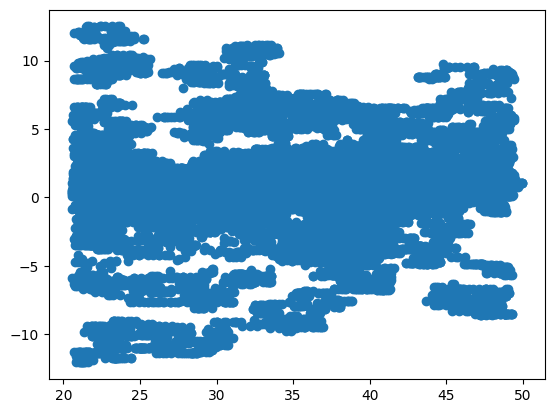

In [34]:
plt.scatter(df['temperature'],df['pressure'])

In [35]:
km= KMeans(n_clusters=3, random_state=0)

In [37]:
df1= df[['temperature','pressure']]
df1

,temperature,pressure
0,40.881866,-0.101806
1,44.913806,2.661616
2,38.295822,-2.438871
3,41.306586,-0.101806
4,44.903178,3.080849
...,...,...
39255,43.138727,-0.421404
39256,23.140147,-2.399335
39257,28.393034,4.526178
39258,43.826907,-0.421404


In [38]:
predict_y= km.fit_predict(df1)
predict_y
#km.labels_

array([2, 2, 0, ..., 1, 2, 1], dtype=int32)

In [39]:
km.cluster_centers_

array([[35.49985649,  0.80652712],
       [25.46266398,  0.705405  ],
       [44.24482514,  0.99059555]])

In [40]:
df['cluster']=predict_y
df

,date,time,temperature,pressure,humidity,label,type,cluster
0,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos,2
1,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos,2
2,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos,0
3,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos,2
4,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos,2
...,...,...,...,...,...,...,...,...
39255,27-Apr-19,05:40:42,43.138727,-0.421404,40.661168,1,xss,2
39256,27-Apr-19,05:40:42,23.140147,-2.399335,68.605010,1,xss,1
39257,27-Apr-19,05:40:52,28.393034,4.526178,71.446893,1,xss,1
39258,27-Apr-19,05:40:52,43.826907,-0.421404,40.661168,1,xss,2


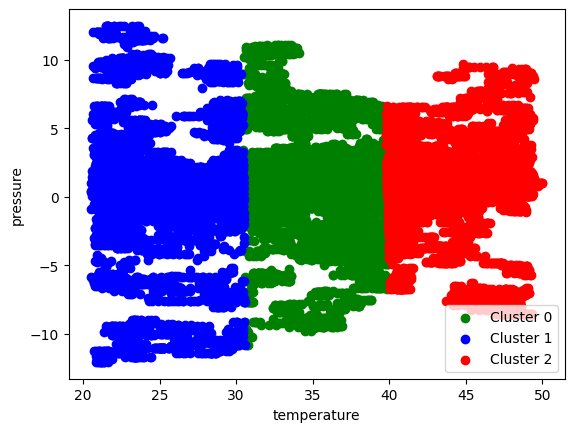

In [41]:
df_c0= df[df.cluster==0]
df_c1=df[df.cluster==1]
df_c2=df[df.cluster==2]

plt.scatter(df_c0['temperature'], df_c0['pressure'], label='Cluster 0', color='green')
plt.scatter(df_c1['temperature'], df_c1['pressure'], label='Cluster 1',color='blue')
plt.scatter(df_c2['temperature'], df_c2['pressure'], label='Cluster 2',color='red')

plt.xlabel('temperature')
plt.ylabel('pressure')
plt.legend()

In [43]:
#Clusters are formed properly, scaling is required

scaler=MinMaxScaler()
scaler.fit(df[['pressure']])
df[['pressure']]= scaler.transform(df[['pressure']])
df

,date,time,temperature,pressure,humidity,label,type,cluster
0,25-Apr-19,17:33:16,40.881866,0.487256,38.363631,1,ddos,2
1,25-Apr-19,17:33:16,44.913806,0.599805,46.141423,1,ddos,2
2,25-Apr-19,17:33:16,38.295822,0.392072,50.850643,1,ddos,0
3,25-Apr-19,17:33:21,41.306586,0.487256,38.363631,1,ddos,2
4,25-Apr-19,17:33:21,44.903178,0.616880,46.141423,1,ddos,2
...,...,...,...,...,...,...,...,...
39255,27-Apr-19,05:40:42,43.138727,0.474240,40.661168,1,xss,2
39256,27-Apr-19,05:40:42,23.140147,0.393682,68.605010,1,xss,1
39257,27-Apr-19,05:40:52,28.393034,0.675745,71.446893,1,xss,1
39258,27-Apr-19,05:40:52,43.826907,0.474240,40.661168,1,xss,2


In [44]:
scaler.fit(df[['temperature']])
df[['temperature']]= scaler.transform(df[['temperature']])
df

,date,time,temperature,pressure,humidity,label,type,cluster
0,25-Apr-19,17:33:16,0.691005,0.487256,38.363631,1,ddos,2
1,25-Apr-19,17:33:16,0.827882,0.599805,46.141423,1,ddos,2
2,25-Apr-19,17:33:16,0.603215,0.392072,50.850643,1,ddos,0
3,25-Apr-19,17:33:21,0.705424,0.487256,38.363631,1,ddos,2
4,25-Apr-19,17:33:21,0.827521,0.616880,46.141423,1,ddos,2
...,...,...,...,...,...,...,...,...
39255,27-Apr-19,05:40:42,0.767621,0.474240,40.661168,1,xss,2
39256,27-Apr-19,05:40:42,0.088711,0.393682,68.605010,1,xss,1
39257,27-Apr-19,05:40:52,0.267035,0.675745,71.446893,1,xss,1
39258,27-Apr-19,05:40:52,0.790984,0.474240,40.661168,1,xss,2


In [45]:
km= KMeans(n_clusters=3, random_state=0)

In [46]:
df1= df[['temperature','pressure']]

In [47]:
predict_y = km.fit_predict(df1)
predict_y

array([0, 0, 2, ..., 1, 0, 1], dtype=int32)

In [48]:
df['New_clusters']=predict_y
df

,date,time,temperature,pressure,humidity,label,type,cluster,New_clusters
0,25-Apr-19,17:33:16,0.691005,0.487256,38.363631,1,ddos,2,0
1,25-Apr-19,17:33:16,0.827882,0.599805,46.141423,1,ddos,2,0
2,25-Apr-19,17:33:16,0.603215,0.392072,50.850643,1,ddos,0,2
3,25-Apr-19,17:33:21,0.705424,0.487256,38.363631,1,ddos,2,0
4,25-Apr-19,17:33:21,0.827521,0.616880,46.141423,1,ddos,2,0
...,...,...,...,...,...,...,...,...,...
39255,27-Apr-19,05:40:42,0.767621,0.474240,40.661168,1,xss,2,0
39256,27-Apr-19,05:40:42,0.088711,0.393682,68.605010,1,xss,1,1
39257,27-Apr-19,05:40:52,0.267035,0.675745,71.446893,1,xss,1,1
39258,27-Apr-19,05:40:52,0.790984,0.474240,40.661168,1,xss,2,0


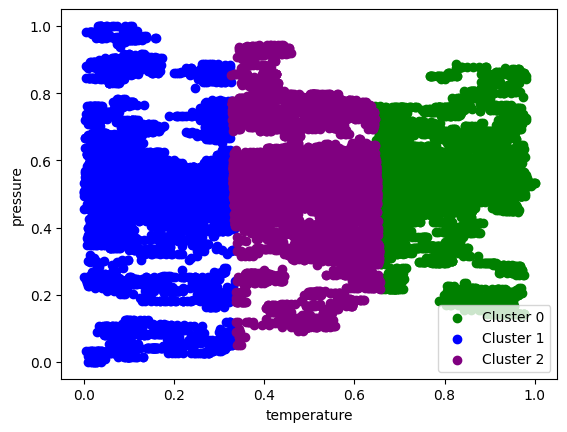

In [50]:
df_c0= df[df.New_clusters==0]
df_c1=df[df.New_clusters==1]
df_c2=df[df.New_clusters==2]

plt.scatter(df_c0['temperature'], df_c0['pressure'], label='Cluster 0', color='green')
plt.scatter(df_c1['temperature'], df_c1['pressure'], label='Cluster 1',color='blue')
plt.scatter(df_c2['temperature'], df_c2['pressure'], label='Cluster 2',color='purple')

plt.xlabel('temperature')
plt.ylabel('pressure')
plt.legend()

In [51]:
km.cluster_centers_

array([[0.8000557 , 0.53152797],
       [0.16294912, 0.51977605],
       [0.49991985, 0.52441774]])

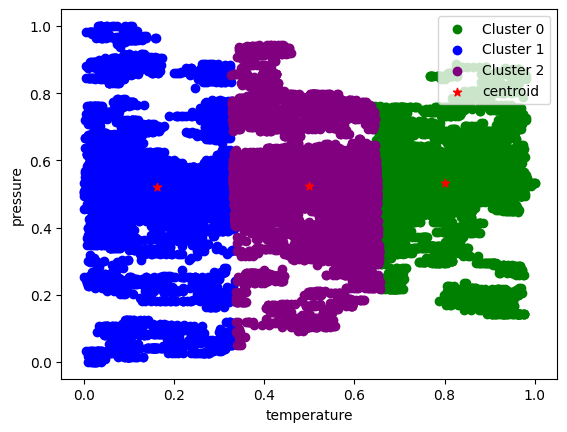

In [52]:
df_c0= df[df.New_clusters==0]
df_c1=df[df.New_clusters==1]
df_c2=df[df.New_clusters==2]

plt.scatter(df_c0['temperature'], df_c0['pressure'], label='Cluster 0', color='green')
plt.scatter(df_c1['temperature'], df_c1['pressure'], label='Cluster 1',color='blue')
plt.scatter(df_c2['temperature'], df_c2['pressure'], label='Cluster 2',color='purple')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='red', marker='*', label ='centroid')

plt.xlabel('temperature')
plt.ylabel('pressure')
plt.legend()

In [53]:
#Elbow method
#Calculate Sum of Square Error(SSE)

k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['temperature', 'pressure']])
    sse.append(km.inertia_)

sse

[3543.1748607033974,
 1436.8283754776846,
 1027.4346959030402,
 852.0355287700988,
 723.4711737475074,
 581.59537178232,
 446.3454534216568,
 385.25592320907833,
 343.8615756254399]

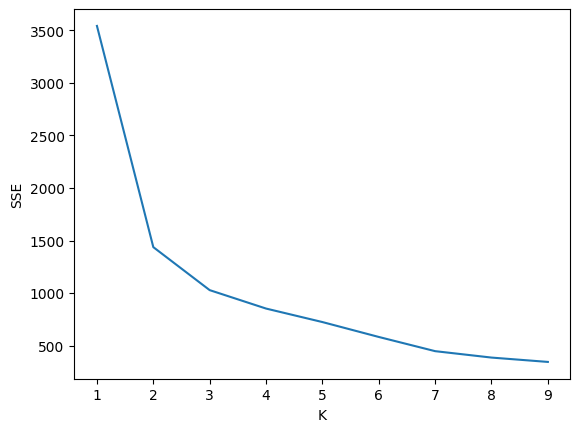

In [54]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)

>> ACTIVITY -2 <br>
Take IRIS dataset. Consider only two colums petal length and petal width. Now apply kmeans clustering.